In [1]:
#!conda install -c conda-forge uproot -y
import uproot
import numpy as np

In [2]:
with uproot.open("/data/QE_MC20_v4_r13167_HWWlvlv.root") as file:
    print(file.keys())
    branches = file["truth;1"]
    print(branches.keys())
    data = branches.arrays(library="np")

['truth;1']
['higgs_pt', 'higgs_eta', 'higgs_phi', 'higgs_m', 'higgs_pdgId', 'w_pos_pt', 'w_pos_eta', 'w_pos_phi', 'w_pos_m', 'w_pos_pdgId', 'lep_pos_pt', 'lep_pos_eta', 'lep_pos_phi', 'lep_pos_pdgId', 'nu_pt', 'nu_eta', 'nu_phi', 'nu_pdgId', 'w_neg_pt', 'w_neg_eta', 'w_neg_phi', 'w_neg_m', 'w_neg_pdgId', 'lep_neg_pt', 'lep_neg_eta', 'lep_neg_phi', 'lep_neg_pdgId', 'anti_nu_pt', 'anti_nu_eta', 'anti_nu_phi', 'anti_nu_pdgId']


In [3]:
lep_pos_pt = data["lep_pos_pt"]
lep_pos_eta = data["lep_pos_eta"]
lep_pos_phi = data["lep_pos_phi"]
lep_pos_m = np.zeros_like(lep_pos_pt)
nu_pt = data["nu_pt"]
nu_eta = data["nu_eta"]
nu_phi = data["nu_phi"]
nu_m = np.zeros_like(nu_pt)

w_pos_m = data["w_pos_m"]

lep_neg_pt = data["lep_neg_pt"]
lep_neg_eta = data["lep_neg_eta"]
lep_neg_phi = data["lep_neg_phi"]
lep_neg_m = np.zeros_like(lep_neg_pt)
anti_nu_pt = data["anti_nu_pt"]
anti_nu_eta = data["anti_nu_eta"]
anti_nu_phi = data["anti_nu_phi"]
anti_nu_m = np.zeros_like(anti_nu_pt)

w_neg_m = data["w_neg_m"]

In [4]:
def px(pt, phi):
    return pt * np.cos(phi)

def py(pt, phi):
    return pt * np.sin(phi)

def pz(pt, eta):
    return pt * np.sinh(eta)

def energy(pt, eta, m):
    return np.sqrt(np.square(pt) * np.square(np.cosh(eta)) + np.square(m))

In [5]:
lep_pos_px = px(lep_pos_pt, lep_pos_phi)
lep_pos_py = py(lep_pos_pt, lep_pos_phi)
lep_pos_pz = pz(lep_pos_pt, lep_pos_eta)
lep_pos_E = energy(lep_pos_pt, lep_pos_eta, lep_pos_m)
nu_px = px(nu_pt, nu_phi)
nu_py = py(nu_pt, nu_phi)
nu_pz = pz(nu_pt, nu_eta)
nu_E = energy(nu_pt, nu_eta, nu_m)

In [6]:
recon_w_px = lep_pos_px + nu_px
recon_w_py = lep_pos_py + nu_py
recon_w_pz = lep_pos_pz + nu_pz
recon_w_E = lep_pos_E + nu_E
recon_w_mass = np.sqrt(np.square(recon_w_E) - np.square(recon_w_px) - np.square(recon_w_py) - np.square(recon_w_pz))

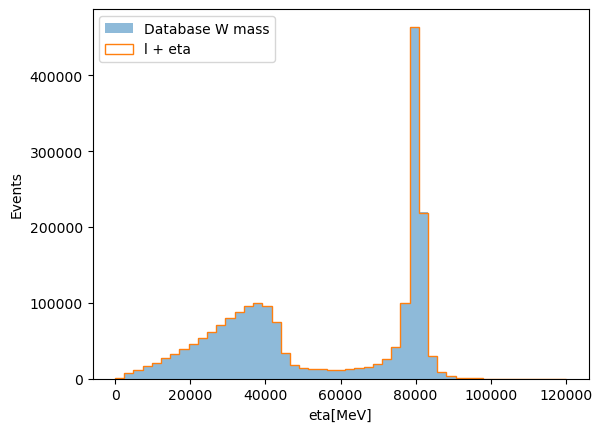

In [7]:
from matplotlib import pyplot as plt

plt.hist(w_pos_m, bins = np.linspace(0, 120000, 50), histtype="stepfilled",alpha=0.5, label="Database W mass")
plt.hist(recon_w_mass, bins = np.linspace(0,120000,50), histtype="step", label="l + eta")
plt.xlabel("eta[MeV]")
plt.ylabel("Events")
plt.legend()
plt.show()